# Análisis de Estrategia de Inversión: Dollar Cost Averaging (DCA)

Este proyecto evalúa distintas estrategias de inversión periódica basadas en datos históricos del índice S&P 500 y el ETF SPY, con énfasis en identificar el mejor día hábil del mes para invertir. La estrategia principal, conocida como Dollar Cost Averaging (DCA), consiste en invertir una cantidad fija de dinero en un día específico de cada mes, independientemente de las condiciones del mercado. Se calcula la rentabilidad anualizada resultante para cada día hábil y se comparan los resultados con los rendimientos promedio del S&P 500 y del ETF SPY.

Para este análisis, se utilizan las siguientes librerías:
- yfinance: para la extracción de datos históricos de precios.
- pandas: para el procesamiento y manipulación de los datos.
- matplotlib: para la visualización gráfica de los resultados.
- numpy_financial: para calcular métricas financieras avanzadas, como la Tasa Interna de Retorno (TIR).

La métrica principal de evaluación es la TIR anualizada, que refleja el rendimiento ajustado al tiempo de cada estrategia.

<hr/>

## 1. Importar Librerías Necesarias

En esta sección se instalan e importan las librerías esenciales para el análisis. `yfinance` permite descargar datos históricos de activos financieros desde Yahoo Finance, `pandas` se utiliza para manipular y analizar datos tabulares, y `matplotlib` es usada para crear gráficos que visualizan los resultados del análisis.

In [189]:
# Instalar las librerías necesarias (solo si no están instaladas)
# !pip install yfinance pandas matplotlib numpy-financial

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy_financial as npf

%matplotlib inline

## 2. Funciones Principales

### 2.1. Calcular la Rentabilidad Anualizada

La función `calculate_annualized_return` recibe un ticker como entrada, descarga los datos históricos del activo (ticker) y calcula su rentabilidad anualizada. Esto se logra calculando primero las rentabilidades diarias promedio y luego anualizándolas asumiendo 252 días hábiles al año. La función devuelve tanto la rentabilidad anualizada en porcentaje como los datos históricos descargados.

In [190]:
def calculate_annualized_return(ticker):

    data = yf.Ticker(ticker).history(period='max')  # descarga datos históricos
    daily_returns = data['Close'].pct_change()  # calcula rentabilidades diarias
    mean_daily_returns = daily_returns.mean()  # calcula la rentabilidad promedio diaria
    annualized_avg_returns = (1 + mean_daily_returns) ** 252 - 1  # anualiza la rentabilidad
    return annualized_avg_returns * 100, data  # devuelve la rentabilidad anualizada (%) y los datos


### 2.2. Limpiar Datos

La función `clean_data` asegura que los datos sean válidos y útiles eliminando filas con valores faltantes (`NaN`) y aquellas donde el precio de apertura es igual a cero. Esto es crucial para evitar errores en los cálculos posteriores.

In [191]:
def clean_data(data):
    
    data = data.dropna()  # elimina valores NaN
    data = data[data['Open'] > 0]  # filtra precios de apertura válidos
    return data


### 2.3. Calcular la rentabilidad histórica promedio de cada activo

En esta sección, se utiliza la función calculate_annualized_return para calcular la rentabilidad anualizada de dos activos: el índice S&P 500 (^GSPC) y el ETF SPY (SPY). La función devuelve dos valores: la rentabilidad anualizada en porcentaje y los datos históricos descargados.

In [192]:
# rentabilidad anualizada del S&P 500
annualized_sp500, data = calculate_annualized_return("^GSPC")
print(f"La rentabilidad anualizada promedio del índice S&P 500 es {annualized_sp500:.2f}%")

# rentabilidad anualizada del ETF SPY
annualized_spy, data = calculate_annualized_return("SPY")
print(f"La rentabilidad anualizada promedio del ETF SPY es {annualized_spy:.2f}%")

La rentabilidad anualizada promedio del índice S&P 500 es 8.15%
La rentabilidad anualizada promedio del ETF SPY es 12.51%


Veamoslo graficado:

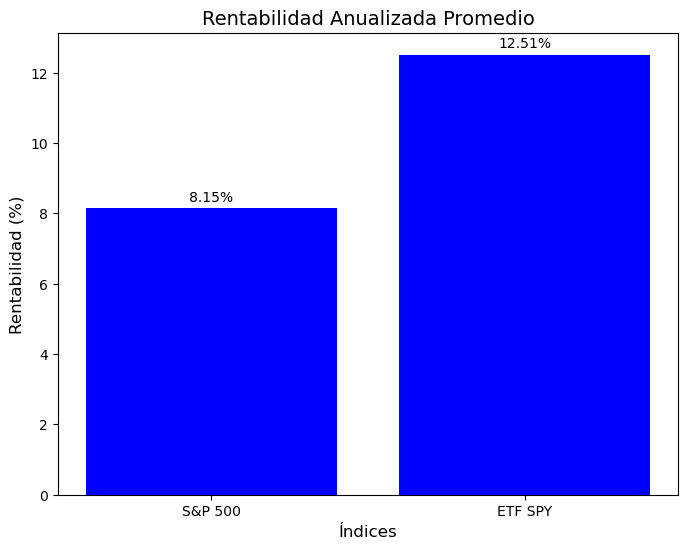

In [193]:
import matplotlib.pyplot as plt

# datos de las rentabilidades anualizadas
indices = ['S&P 500', 'ETF SPY']  # Nombres de los índices
values = [annualized_sp500, annualized_spy]  # Valores de rentabilidad anualizada

# crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Establecer el tamaño del gráfico
plt.bar(indices, values, color=['blue'])  # Crear las barras con colores

# etiquetas y título del gráfico
plt.title('Rentabilidad Anualizada Promedio', fontsize=14)  # Título del gráfico
plt.ylabel('Rentabilidad (%)', fontsize=12)  # Etiqueta del eje Y
plt.xlabel('Índices', fontsize=12)  # Etiqueta del eje X

# etiquetas encima de las barras
for i, val in enumerate(values):
    plt.text(i, val + 0.2, f"{val:.2f}%", ha='center', fontsize=10)


Usualmente el ETF SPY tiende a obtener un rendimiento mayor al índice S&P 500 por las siguientes razones:
1. Períodos diferentes: El SPY cubre un período más reciente y podría estar sesgado hacia rendimientos más altos si incluye años más alcistas. El SPY se lanzó en 1993, por lo que su historial es más reciente y solo incluye rendimientos desde esa fecha, mientras que índice S&P 500 incluir un historial más largo (décadas previas), lo que puede incluir períodos de bajo rendimiento como las décadas de 1970 o 1930.
2. Dividendos reinvertidos: El SPY incluye el efecto de dividendos reinvertidos, mientras que el cálculo del S&P 500 puede no incluirlo si no se usan precios ajustados.
3. Diferencias metodológicas: El uso de precios ajustados frente a precios sin ajustar puede crear una discrepancia.

## 3. Estrategia de Inversión

La estrategia analizada se basa en el principio de Dollar Cost Averaging (DCA), también conocido como promedio del costo en dólares. Esta técnica de inversión consiste en destinar una cantidad fija de dinero para invertir regularmente (en este caso, $100 mensuales), independientemente del precio del activo en ese momento. En lugar de intentar "adivinar" el mejor momento para invertir, el DCA distribuye las compras a lo largo del tiempo, lo que ayuda a mitigar el riesgo de invertir todo el capital en un pico del mercado.

En este análisis, se evalúa una variación de esta estrategia en la que se determina el mejor día hábil del mes para invertir de manera constante. La idea es calcular la rentabilidad anualizada de invertir en diferentes días del mes (del 1 al 18) y analizar si ciertos días ofrecen rendimientos superiores en promedio.

Al comparar esta estrategia con una estrategia buy-and-hold tradicional, que implica invertir todo el capital al inicio y mantenerlo, se busca determinar si el DCA optimizado puede generar beneficios adicionales en términos de rentabilidad y gestión de riesgos. Esto es particularmente útil en mercados volátiles, donde el DCA puede suavizar el impacto de las fluctuaciones del mercado al promediar los precios de compra a lo largo del tiempo.

En este análisis utilizaremos dos activos financieros para evaluar la estrategia de inversión:

Índice S&P 500 (^GSPC): Representa el desempeño de las 500 empresas más grandes de Estados Unidos. Es ampliamente considerado como un indicador del mercado de acciones estadounidense y es utilizado como referencia (benchmark) para medir el desempeño de estrategias de inversión. El S&P 500 refleja el rendimiento agregado del mercado, excluyendo costos de gestión o dividendos reinvertidos.

ETF SPY (SPY): Este ETF (Exchange-Traded Fund) busca replicar el desempeño del S&P 500. A diferencia del índice en sí, el SPY es un instrumento financiero que puede ser adquirido directamente por los inversionistas. Ofrece una representación más realista para los inversionistas debido a su disponibilidad en el mercado y sus costos de gestión, que están incorporados en su desempeño.

En resumen, utilizaremos el SPY para implementar la estrategia de inversión, dado que es un instrumento accesible para los inversionistas, y lo compararemos con el rendimiento histórico del S&P 500, que sirve como referencia del mercado.

El objetivo final será encontrar una estrategia de inversión con la cual logremos obtener un rendimiento mayor al referenciado por el mercado, y que calculamos anteriormente (8.15% o 12.51%)

### Primer paso: Poniendo a prueba la estrategia

Para poner a prubea la estrategia realizaré un backsting probando únicamente en invertir 100 USD todos los primeros días hábiles de cada mes, al precio de apertura del día.

Por lo que el primer paso será filtrar el primer día hábil de cada mes

In [194]:
data['Year'] = data.index.year # extrae el año de la columna de índice (que es una fecha) y lo almacena en una nueva columna llamada Year
data['Month'] = data.index.month  # extrae el mes de la columna de índice (que es una fecha)  y lo almacena en una nueva columna llamada Month
first_business_day = data.groupby(['Year', 'Month']).first().reset_index() # agrupar por año y mes para encontrar el primer día hábil
first_business_day['Date'] = pd.to_datetime(first_business_day[['Year', 'Month']].assign(Day=1)) # crear una columna de fecha a partir de Year y Month, usando el primer día de cada mes
first_business_day.set_index('Date', inplace=True) # establecer la columna Date como el índice

In [195]:
first_business_day.head()

,Year,Month,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,,,
1993-01-01,1993,1,24.626128,24.626128,24.503610,24.608625,1003200,0.0,0.0,0.0
1993-02-01,1993,2,24.626122,24.783646,24.626122,24.783646,480500,0.0,0.0,0.0
1993-03-01,1993,3,24.958673,24.958673,24.766144,24.801149,66500,0.0,0.0,0.0
1993-04-01,1993,4,25.463419,25.463419,25.287567,25.340322,129500,0.0,0.0,0.0
1993-05-01,1993,5,24.812773,24.935869,24.707261,24.935869,80500,0.0,0.0,0.0


Quedaron guardados en el dataframe `first_business_day` los datos del primer día hábil de cada mes, desde el año 1993 hasta el año 2024.

Ahora para iniciar el backtesting de la estrategia, crearemos las siguientes variables y elementos 

In [196]:
portfolio_values = [] # lista vacía para almacenar los valores del portafolio y el total invertido en cada fecha.
units_held = 0 # variable para guardar la cantidad acumulada de unidades (acciones) compradas.
total_investment = 0 # se actualiza con cada inversión mensual al calcular cuántas acciones se pueden comprar con la cantidad invertida.
initial_investment = 100  # corresponde al valor fijo que se invertirá mensualmente.

En este bloque de código a continuación realicé una simulación de inversión mensual basada en el primer día hábil de cada mes. Para ello, iteré sobre cada fila del DataFrame `first_business_day`, que contiene los datos de los primeros días hábiles agrupados por mes. En cada iteración, incrementé el total acumulado invertido añadiendo una cantidad fija definida como `initial_investment`. Luego, calculé cuántas acciones podía adquirir ese mes utilizando el precio de apertura y actualicé la cantidad total de unidades mantenidas. Finalmente, registré la fecha, el valor actual del portafolio (multiplicando las unidades acumuladas por el precio de apertura) y el total invertido en una lista llamada `portfolio_values`, que será utilizada posteriormente para el análisis y la visualización del desempeño de la estrategia.

In [197]:
for _, row in first_business_day.iterrows():  # iterar sobre cada fila del DataFrame que contiene el primer día hábil de cada mes y ejecutar el siguiente código:
    total_investment += initial_investment # Incrementar el total invertido con el monto fijo de inversión mensual y se suma al valor anterior de total_investmet
    units_held += initial_investment / row['Open']  # calcular cuántas unidades (acciones) se pueden comprar con la inversión del mes y se suman al valor anterior de units_held
    
        # Añadir un registro al portafolio que incluye la fecha, el valor del portafolio y el total invertido
    portfolio_values.append({ 
        'Date': row.name,  # El índice del DataFrame (Date) se usa como la fecha de registro
        'Portfolio Value': units_held * row['Open'],  # Calcular el valor actual del portafolio
        'Total Investment': total_investment # Registrar el monto total invertido hasta la fecha
    })

# Convertir los resultados a un DataFrame
portfolio_df = pd.DataFrame(portfolio_values)  # Crear un DataFrame a partir de la lista creada en la función
portfolio_df.set_index('Date', inplace=True)  # Establecer la columna 'Date' como índice

Luego de ejecutarse la función anterior, obtenemos un DataFrame llamado `portfolio_df`, que contiene las fechas correspondientes al primer día hábil de cada mes, el valor acumulado del portafolio en esa fecha (calculado en función del precio de apertura del día y las acciones acumuladas), y el total de dinero invertido hasta esa misma fecha.

A continuación, graficamos estos resultados para visualizar la evolución del portafolio y entender mejor el desempeño de la estrategia.

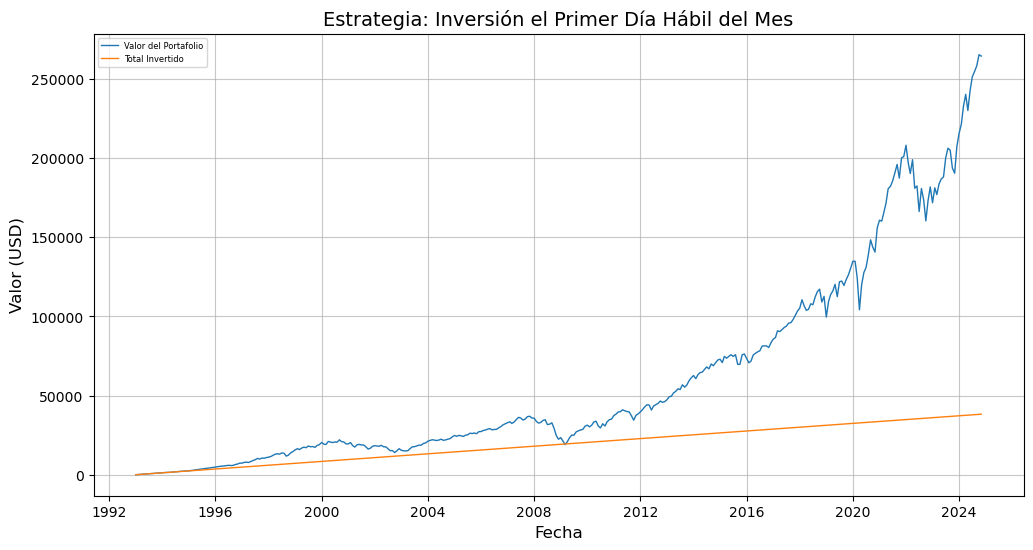

In [198]:

plt.figure(figsize=(12, 6)) # establece las dimensiones del gráfico. El ancho es 12 unidades y la altura es 6 unidades.

plt.plot(portfolio_df.index, portfolio_df['Portfolio Value'], label='Valor del Portafolio', linewidth=1) # Grafíca el valor del portafolio
# Toma como eje X el índice del DataFrame (las fechas) 
# Toma la columna `Portfolio Value` para graficar el valor del portafolio en el eje Y.
# `label='Valor del Portafolio'` añade una etiqueta para la leyenda.
# `linewidth=2` establece el grosor de la línea.

plt.plot(portfolio_df.index, portfolio_df['Total Investment'], label='Total Invertido', linewidth=1) # Grafíca el valor total invertido
# Similar al gráfico anterior, pero utiliza la columna `Total Investment` para mostrar el monto total invertido.
# `linestyle='--'` dibuja una línea punteada para diferenciarla visualmente del valor del portafolio.
# `linewidth=2` asegura que la línea sea lo suficientemente visible.

# Personalizar el gráfico
plt.title('Estrategia: Inversión el Primer Día Hábil del Mes', fontsize=14) # título del gráfico
plt.xlabel('Fecha', fontsize=12) # etiqueta del eje x
plt.ylabel('Valor (USD)', fontsize=12) # etiqueta del eje y
plt.legend(fontsize=6)  # añade una leyendas del gráfico
plt.grid(alpha=0.7) # añade una cuadrícula al fondo del gráfico


En el gráfico se observa que la estrategia Dollar Cost Averaging (DCA) aplicada desde 1993 ha generado una rentabilidad significativa. Esto refuerza la hipótesis de que invertir de manera constante y periódica puede ser una estrategia efectiva a largo plazo, independientemente de las condiciones del mercado. Este enfoque permite suavizar el impacto de la volatilidad del mercado y construir un portafolio consistente a lo largo del tiempo.

Ahora, veamos un resumen cuantitativo de los resultados, calculando la rentabilidad promedio anualizada y el total invertido durante este período. Para determinar la rentabilidad anualizada del portafolio, utilizaremos la fórmula financiera de la Tasa Interna de Retorno (IRR). Este método es ideal para evaluar estrategias de inversión con aportaciones periódicas, ya que toma en cuenta todos los flujos de efectivo (inversiones realizadas) y el valor final del portafolio. La IRR calcula el rendimiento efectivo ajustado al tiempo, permitiendo comprender con mayor precisión el desempeño real del portafolio en este período.

In [199]:
# Crear la lista de flujos de efectivo

cash_flows = [-initial_investment] * len(portfolio_df)  # Contribuciones periódicas (negativas)
cash_flows[-1] += portfolio_df['Portfolio Value'].iloc[-1]  # Añadir el valor final del portafolio (positivo) al final de la lista

monthly_irr = npf.irr(cash_flows) # Calcular la TIR (rendimiento mensual promedio)

annualized_irr = (1 + monthly_irr) ** 12 - 1 # Convertir a TIR anualizada

print(f"El rendimiento anualizado del portafolio, invirtiendo el primer día hábil del mes fue de: {annualized_irr * 100:.2f}%") # Mostrar los resultados
print(f"El valor total invertido en el portafolio fué de: {total_investment} USD") # Mostrar los resultados
print(f"El valor final del portafolio es de: {units_held * row['Open']} USD") # Mostrar los resultados

El rendimiento anualizado del portafolio, invirtiendo el primer día hábil del mes fue de: 10.26%
El valor total invertido en el portafolio fué de: 38300 USD
El valor final del portafolio es de: 264316.5272448553 USD


El rendimiento obtenido fue de 10.35%, superando el rendimiento promedio histórico del S&P 500 en +2,2, lo que sugiere que la estrategia de Dollar Cost Averaging (DCA), invirtiendo el primer día de cada mes, puede ser una opción efectiva para generar valor a largo plazo. Sin embargo, el rendimiento se encuentra por debajo del rendimiento del ETF SPY en el mismo período en -2.16%, lo que podría indicar que factores como los costos asociados o la reinversión de dividendos influyen en los resultados.

Es importante resaltar que esta estrategia permite mitigar riesgos asociados a la volatilidad, ya que distribuye las inversiones de manera uniforme en el tiempo. Aunque no alcanza el rendimiento de una estrategia pasiva como el buy-and-hold, ofrece una alternativa más accesible y disciplinada para los inversionistas que buscan consistencia en sus aportaciones.

Aunque la estrategia DCA ayuda a reducir el impacto de la volatilidad al distribuir las inversiones de manera uniforme en el tiempo, surge la pregunta: ¿podemos optimizar esta estrategia para mejorar los rendimientos?. Una posible mejora sería verificar si los rendimientos varían dependiendo del día hábil del mes en el que se realice la inversión. Es posible que ciertos días ofrezcan mejores oportunidades, dependiendo de patrones de mercado o del comportamiento del activo.

Por lo cual, iteraremos entre los días hábiles del 1 al 18 (para efectos del cálculo será del 0 al 17) de cada mes para identificar si existe un día que ofrezca un mejor rendimiento promedio anualizado. Este análisis nos permitirá determinar si ajustar el día de inversión dentro de la estrategia DCA puede ser una herramienta útil para optimizar los resultados, sin perder la estructura disciplinada de las aportaciones periódicas.

### 2.3. Encontrar el Mejor Día para Invertir

En este bloque de código se realiza un análisis para identificar cuál es el mejor día hábil del mes para invertir utilizando la estrategia de inversión periódica, conocida como Dollar Cost Averaging (DCA). El análisis consiste en iterar entre los días hábiles del 0 al 17 (18 días hábiles en total) y calcular el rendimiento anualizado del portafolio para cada caso. Para cada día hábil, primero se filtran los datos correspondientes a ese día en cada mes utilizando la función `nth(day)` para seleccionar el día específico. Luego, se inicializan las variables necesarias para la simulación, incluyendo el total invertido (`total_investment`), las acciones acumuladas (`units_held`), y una lista para almacenar los valores del portafolio.

En cada iteración, se simula la inversión mensual calculando cuánto se invierte y cuántas acciones se compran en el día hábil específico. Posteriormente, realizamos lo mismo que realizamos anteriorme, se calcula el valor actual del portafolio basado en las acciones acumuladas y el precio de apertura del día. Los resultados se almacenan en un DataFrame temporal para calcular la Tasa Interna de Retorno (TIR), considerando los flujos de efectivo negativos (las inversiones realizadas) y el flujo positivo final (el valor del portafolio). La TIR mensual se convierte a TIR anualizada para obtener el rendimiento ajustado al tiempo. Finalmente, los rendimientos de cada día hábil se almacenan en una lista, que luego se convierte en un DataFrame para facilitar el análisis.

El resultado de este análisis permite determinar el día hábil en el que la estrategia de inversión genera el mayor rendimiento anualizado, proporcionando una optimización para la estrategia DCA sin alterar su estructura de inversión periódica.

In [200]:

best_day_results = []  # lista para almacenar los resultados del rendimiento de cada día hábil

for day in range(1, 19):  # iterar desde el día hábil 1 hasta el día hábil 18
        
    day_business_data = data.groupby(['Year', 'Month']).nth(day - 1).dropna()  # usar nth para seleccionar el día hábil y eliminar valores nulos
    
    # variables de simulación
    
    portfolio_values = [] # lista para registrar el valor del portafolio en cada fecha
    units_held = 0 # total de acciones acumuladas en el portafolio
    total_investment = 0 # total acumulado de dinero invertido
    
    # Iterar sobre las filas del DataFrame filtrado para el día hábil actual (este es el mismo proceso explicado anteriormente)
    for _, row in day_business_data.iterrows():
        total_investment += initial_investment
        units_held += initial_investment / row['Open']
        portfolio_values.append({
            'Date': row.name,
            'Portfolio Value': units_held * row['Open'],
            'Total Investment': total_investment
        })
    
    # Convertir los resultados del día hábil a un DataFrame  (este es el mismo proceso explicado anteriormente)
    portfolio_df = pd.DataFrame(portfolio_values).set_index('Date')
    
    # Calcular la TIR (rendimiento anualizado del portafolio)  (este es el mismo proceso explicado anteriormente)
    cash_flows = [-initial_investment] * len(portfolio_df)
    cash_flows[-1] += portfolio_df['Portfolio Value'].iloc[-1]
    monthly_irr = npf.irr(cash_flows)
    annualized_irr = (1 + monthly_irr) ** 12 - 1
    
    # Almacenar los resultados del día hábil
    best_day_results.append({
        'Day': day,
        'Annualized Return': annualized_irr * 100
    })

best_day_df = pd.DataFrame(best_day_results) # convertir los resultados a un DataFrame para análisis y visualización

# Identificar el mejor día
best_day = best_day_df.loc[best_day_df['Annualized Return'].idxmax()]

# Extraer el valor final del portafolio y el total invertido
final_portfolio_value = portfolio_values[-1]['Portfolio Value']
final_total_investment = portfolio_values[-1]['Total Investment']

# Mostrar resultados del mejor día
print(f"El mejor día hábil para invertir es el día {int(best_day['Day'])}")
print(f"Con un rendimiento anualizado de: {best_day['Annualized Return']:.2f}%")
print(f"El valor final del portafolio para el mejor día es: {final_portfolio_value:.2f} USD")
print(f"El total invertido para el mejor día es: {final_total_investment:.2f} USD")

El mejor día hábil para invertir es el día 17
Con un rendimiento anualizado de: 10.49%
El valor final del portafolio para el mejor día es: 271880.33 USD
El total invertido para el mejor día es: 38100.00 USD


Para visualizar de forma más clara y gráfica los resultados del análisis, generamos un gráfico de barras que muestra el rendimiento anualizado para cada día hábil del mes. En este gráfico, cada barra representa un día hábil específico (del 0 al 17), y la altura de la barra indica el rendimiento anualizado obtenido al invertir consistentemente en ese día. Además, destacamos en un color diferente el día con el mejor rendimiento, lo que facilita identificar la opción óptima para maximizar los resultados de la estrategia de inversión periódica. Este enfoque gráfico complementa los cálculos numéricos y proporciona una representación visual intuitiva de cómo varía el rendimiento entre los diferentes días hábiles.

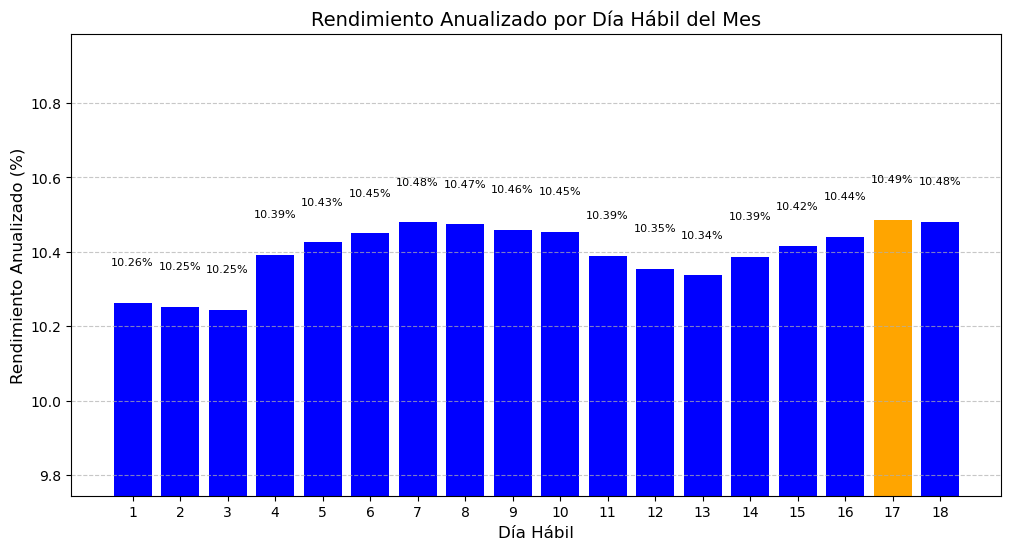

In [201]:
# Graficar los rendimientos por día hábil
plt.figure(figsize=(12, 6))


colors = ['blue' if day != best_day['Day'] else 'orange' for day in best_day_df['Day']] # Resaltar el mejor día. Se usa 'blue' para todos los días excepto el mejor día, que se resalta en 'orange'.

plt.bar(best_day_df['Day'], best_day_df['Annualized Return'], color=colors) # Dibujar un gráfico de barras

# Ajustar el rango del eje Y
plt.ylim(
    best_day_df['Annualized Return'].min() - 0.5, 
    best_day_df['Annualized Return'].max() + 0.5
)

# Configurar los valores del eje X como enteros del 1 al 18
plt.xticks(ticks=range(1, 19), labels=range(1, 19))

# Etiquetas encima de las barras
for i, val in enumerate(best_day_df['Annualized Return']):
    plt.text(
        best_day_df['Day'][i], val + 0.1,  # Ajustar posición del texto
        f"{val:.2f}%",  # Formato del texto
        ha='center', fontsize=8
    )

# Títulos y etiquetas del gráfico
plt.title('Rendimiento Anualizado por Día Hábil del Mes', fontsize=14)
plt.xlabel('Día Hábil', fontsize=12)
plt.ylabel('Rendimiento Anualizado (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Conclusión

La estrategia de inversión periódica Dollar Cost Averaging (DCA), invirtiendo consistentemente $100 el día 17 de cada mes, genera un rendimiento anualizado de 10.49%, lo que supera la rentabilidad promedio anualizada del índice S&P 500 (8.15%). Este resultado muestra que la estrategia DCA aplicada al ETF SPY puede ser una forma efectiva de superar los rendimientos históricos del índice S&P 500, especialmente para inversionistas que buscan un enfoque disciplinado y a largo plazo.

Sin embargo, es importante notar que el rendimiento de esta estrategia queda por debajo del rendimiento anualizado promedio del ETF SPY (12.51%). Esto puede deberse a varios factores:

- Costo de oportunidad: La estrategia DCA distribuye las inversiones a lo largo del tiempo, lo que reduce la exposición inicial al mercado. En un mercado con tendencia alcista, como el SPY en el período analizado, una estrategia de inversión única ("buy-and-hold") puede superar a DCA.
- Ausencia de costos de comisiones y administración: Los cálculos no incluyen costos asociados a comisiones de compra/venta ni tarifas de administración del ETF, lo que podría afectar negativamente el rendimiento neto del portafolio en un escenario real.

Desde una perspectiva financiera, esta estrategia sí es rentable, ya que logra transformar un total invertido de **$38,100 USD** en un portafolio final valorado en **271,880.33 USD**, lo que representa un incremento significativo del capital. Además, la estrategia presenta ventajas como:

- Mitigación de la volatilidad: DCA distribuye el riesgo temporal, lo que la hace adecuada para inversionistas que desean evitar el riesgo de invertir grandes sumas en momentos desfavorables.
- Simplicidad y disciplina: Fomenta un hábito constante de inversión, independiente de las fluctuaciones del mercado.

No obstante, para inversionistas con mayor tolerancia al riesgo y que pueden realizar inversiones únicas ("lump-sum investing"), la estrategia DCA podría no ser la más eficiente en términos de maximización del rendimiento. La superioridad del rendimiento promedio del ETF SPY (12.51%) sugiere que una estrategia pasiva, basada en comprar y mantener, puede ser más efectiva en mercados alcistas.

En resumen, la estrategia DCA es una herramienta efectiva y rentable, especialmente para inversionistas disciplinados que buscan minimizar riesgos y construir riqueza a largo plazo. Sin embargo, para maximizar el rendimiento, podría ser necesario evaluar otras estrategias, como una mayor exposición inicial o la inversión en un solo momento en activos con alto potencial de crecimiento.

Veamos estos resultados en una última gráfica:

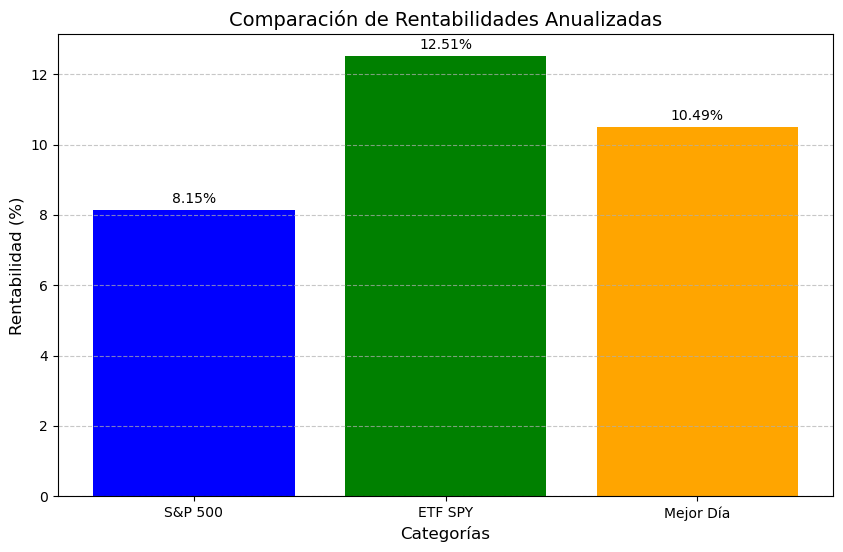

In [202]:
# Datos para las tres barras
categories = ['S&P 500', 'ETF SPY', 'Mejor Día']  # Etiquetas para las barras
values = [annualized_sp500, annualized_spy, best_day['Annualized Return']]  # Valores de rentabilidad anualizada

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(categories, values, color=['blue', 'green', 'orange'])  # Crear las barras con colores diferenciados

# Títulos y etiquetas del gráfico
plt.title('Comparación de Rentabilidades Anualizadas', fontsize=14)  # Título del gráfico
plt.ylabel('Rentabilidad (%)', fontsize=12)  # Etiqueta del eje Y
plt.xlabel('Categorías', fontsize=12)  # Etiqueta del eje X

# Etiquetas encima de las barras
for i, val in enumerate(values):
    plt.text(i, val + 0.2, f"{val:.2f}%", ha='center', fontsize=10)  # Añadir etiquetas con los valores exactos

# Añadir una cuadrícula para mejorar la visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


En este gráfico se comparan las rentabilidades anualizadas del índice S&P 500, del ETF SPY, y del mejor día hábil de inversión identificado en el análisis. El objetivo es visualizar las diferencias de rendimiento entre estas tres estrategias y evaluar su efectividad a lo largo del tiempo.